In [55]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, features, learning_rate, epochs, error_threshold=0.1):
      self.input_size = input_size
      self.learning_rate = learning_rate
      self.epochs = epochs
      self.MSE = []
      self.weights =  np.random.uniform(-1,1,(input_size,features))
      self.biases = np.random.uniform(-1,1,features)
      self.error_threshold = error_threshold

    #weght sum
    def find_net(self, x):
      return np.dot(x, self.weights) + self.biases

    #сигмоида
    def activate(self, net):
      return 1/(1+np.exp(-net))

    def derivative_activation(self, y_output):
      return y_output * (1 - y_output)

    def fit(self, X, D):
      small_diff_count = 0
      for j in range(self.epochs):
        loss=0
        for i in range(len(D)):
          x = X[i]
          y = D[i]
          net = self.find_net(x)
          y_output = self.activate(net)
          error = y - y_output
          gradient = error * self.derivative_activation(y_output)
          self.weights+= self.learning_rate * np.outer(x, gradient)
          self.biases += self.learning_rate * gradient
          loss += np.mean(error**2)
        self.MSE.append(loss / len(X))
        if self.MSE[-1]>=self.error_threshold:
            print(f"Значение общей ошибки в эпохе {j} превышает пороговое значение {self.error_threshold}")
            break
        if j>0 and abs(self.MSE[-2]- self.MSE[-1]<0.001):
            small_diff_count+=1
        if small_diff_count>3:
            print("Значение потерь меняется незначительно на протяжении нескольких эпох.")
            break

    def evaluate(self, X, y):
        correct_predictions = 0
        for i in range(len(X)):
            net = self.find_net(X[i])
            predict = self.activate(net)
            if np.argmax(predict) == np.argmax(y[i]):
                correct_predictions += 1
        return correct_predictions / len(X)



In [56]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2)

perceptron = Perceptron(input_size=x_train.shape[1], features=y_train.shape[1], learning_rate=1, epochs=5)
perceptron.fit(x_train, y_train)

In [57]:
best_lr = None
best_val_acc = 0
learning_rates = [0.001, 0.01, 0.1, 0.25, 0.5, 0.7, 1.0]

for lr in learning_rates:
    print(f"\nlearning rate = {lr}")
    perceptron = Perceptron(input_size=x_train.shape[1],features=y_train.shape[1], learning_rate=lr, epochs=10)

    perceptron.fit(x_val, y_val)
    val_acc = perceptron.evaluate(x_val, y_val)
    print(f"Точность на валидации: {val_acc * 100:.2f}%")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_lr = lr

print(f"\nЛучший learning rate: {best_lr} с точностью {best_val_acc * 100:.2f}%")


learning rate = 0.001
Значение общей ошибки в эпохе 0 превышает пороговое значение 0.1
Точность на валидации: 11.15%

learning rate = 0.01
Точность на валидации: 62.15%

learning rate = 0.1
Значение потерь меняется незначительно на протяжении нескольких эпох.
Точность на валидации: 47.58%

learning rate = 0.25
Точность на валидации: 61.52%

learning rate = 0.5
Точность на валидации: 81.73%

learning rate = 0.7
Точность на валидации: 65.18%

learning rate = 1.0
Точность на валидации: 64.72%

Лучший learning rate: 0.5 с точностью 81.73%


In [58]:
# Переобучение
perceptron = Perceptron(input_size=x_train.shape[1], features=y_train.shape[1], learning_rate=best_lr, epochs=10)
perceptron.fit(x_train, y_train)

Значение потерь меняется незначительно на протяжении нескольких эпох.


In [59]:
accuracy = perceptron.evaluate(x_test, y_test)

print(f"Точность на тестовой выборке: {accuracy * 100:.2f}%")

Точность на тестовой выборке: 75.72%


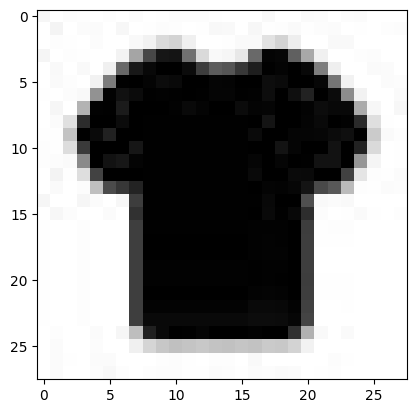

Результат: 0


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

test_image = plt.imread("/content/t-short.jpg")


test_image = 1 - (test_image / 255)

test_image = test_image.reshape(28 * 28)

plt.imshow(test_image.reshape(28, 28), cmap="Greys")
plt.show()

image = np.reshape(test_image, (-1, 1))
linear_output = np.dot(perceptron.weights.T, image)
final_output = perceptron.activate(linear_output.T)
print(f"Результат: {final_output.argmax()}")